In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [2]:
import csv
import io
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import nltk
import spacy
from bs4 import BeautifulSoup
import time

import tensorflow as tf
print(tf.__version__)

import numpy as np
from keras.preprocessing import sequence
from keras.models import Sequential, Model
from keras.layers import Dense, Embedding , Activation, LSTM 
from keras.initializers import glorot_uniform
from keras.utils import to_categorical
from keras.optimizers import Adam
from keras import backend as K
from keras.layers import Input,Lambda,Reshape

2.2.0


Using TensorFlow backend.


In [9]:
file_1 = "/content/gdrive/My Drive/data/data.csv"
file_2 = "/content/gdrive/My Drive/data/people_wiki.csv"
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [10]:
from nltk.corpus import stopwords
stopWords = set(stopwords.words('english'))
print(stopWords)

also_remove = ['  ' , '.' , '..' , '...' , '[' , ']', '}', '{', '(' , ')' ,',']

{'of', 'he', 'him', 'again', "won't", 'having', 'doesn', 'at', "weren't", 'did', 'should', "needn't", 'being', 'and', 'where', 'then', 'were', 'ma', 'as', 'some', 'very', 'same', 'above', 're', 'itself', "couldn't", 'their', 'is', 'but', 'after', 'for', "don't", "haven't", 'o', "you're", 'whom', 'ours', 'most', 'can', 'own', 'more', 'it', 'them', 'below', 'yourself', 'before', 'once', 'why', 'was', 'have', 'will', 'weren', 'while', "mustn't", 'a', 'just', 'y', 'out', 'has', 'down', 'nor', 'mustn', 'with', 'she', 'further', 't', 'about', 'who', 'doing', 'on', 'shan', "hasn't", 'couldn', "you'll", 'hadn', 'm', 'hasn', 'any', 'needn', 'her', 'himself', 'if', 'theirs', 'there', 'how', 'than', 'that', 'between', 'its', "shan't", "shouldn't", 'aren', 'your', 'i', 'an', "mightn't", "doesn't", 'these', "that'll", "aren't", 'into', 'ourselves', 'now', 'such', 'other', 'didn', 'too', "should've", "wouldn't", "she's", "hadn't", 'hers', 'themselves', 'won', 'we', 'which', 'to', 'yourselves', 'in',

In [11]:
reviews = []
labels = []

start_time = time.time()

with open(file_1 , 'r') as csvfile:
  reader = csv.reader(csvfile , delimiter = ',')
  next(reader)
  for row in reader:
    if row[1] == "positive": labels.append(1)
    if row[1] == "negative" : labels.append(0)
    # labels.append(row[1])
    review = row[0].lower()
    BeautifulSoup(review, "lxml")                                               #remove html tags
    review = review.replace('[^\w\s]','')                                       #remove puntuations
    review = review.replace("<br /><br />"," ")                                 #remove particular tags
    review = "".join([i for i in review if not i.isdigit()])                    #remove_digits
    for word in stopWords:                                                      #remove stopwords
      stopword = " " + word + " "
      review = review.replace(stopword , " ")
    for i in also_remove:
      review = review.replace(i,"")
    reviews.append(review)
with open(file_2 , 'r') as csvfile:
  reader = csv.reader(csvfile , delimiter = ',')
  next(reader)
  for row in reader:
    review = row[2].lower()
    BeautifulSoup(review, "lxml")                 #remove html tags
    review =review.replace('[^\w\s]','')          #remove puntuations
    review= review.replace("<br /><br />"," ")
    for word in stopWords:                        #remove stopwords
      stopword = " " + word + " "
      review = review.replace(stopword , " ")
    reviews.append(review)


print(f'Time taken : {(time.time() - start_time) / 60:.2f} mins')

Time taken : 1.37 mins


In [12]:
print("reviews: " ,len(reviews))
print(reviews[0])
nltk.download('punkt')

reviews:  92786
one reviewers mentioned watchingoz episode hooked right exactly happened me first thing struck oz brutality unflinching scenes violence set right word go trust me show faint hearted timid show pulls punches regards drugs sex violence hardcore classic use word called oz nickname given oswald maximum security state penitentary focuses mainly emerald city experimental section prison cells glass fronts face inwards privacy high agenda em city home manyaryans muslims gangstas latinos christians italians irish moreso scuffles death stares dodgy dealings shady agreements never far away would say main appeal show due fact goes shows dare forget pretty pictures painted mainstream audiences forget charm forget romanceoz mess around first episode ever saw struck nasty surreal say ready it watched more developed taste oz got accustomed high levels graphic violence violence injustice crooked guards who'll sold nickel inmates who'll kill order get away it well mannered middle class i

True

In [0]:
  ## now remove some comman words also

# from collections import Counter
# cnt = Counter()

# for sentence in reviews :
#   for word in sentence.split() :
#     cnt[word] += 1

# print(cnt.most_common(10))


# freq = set([W for (W ,Wc) in cnt.most_common(10)])
# for review in reviews:
#   for word in freq:
#     frequent = " " + word + " "
#     review =review.replace(frequent , " ")

# print("review: " ,len(reviews[0]))
# print(reviews[0])

# stemming and lemmatization

# from nltk.corpus import wordnet
# from nltk.stem import WordNetLemmatizer

# nltk.download('wordnet')
# nltk.download('averaged_perceptron_tagger')

# lemmatizer = WordNetLemmatizer()

# wordnet_map = {"N":wordnet.NOUN, "V":wordnet.VERB, "J":wordnet.ADJ, "R":wordnet.ADV} # Pos tag, used Noun, Verb, Adjective and Adverb

# for review in reviews:
#   pos_tagged_text = nltk.pos_tag(review.split())
#   review = " ".join([lemmatizer.lemmatize(word, wordnet_map.get(pos[0], wordnet.NOUN)) for word, pos in pos_tagged_text])

In [7]:
import gensim
import nltk
import time
from gensim import corpora , models, similarities

start_time = time.time()
tok_corp =[nltk.word_tokenize(sent) for sent in reviews]


model = gensim.models.Word2Vec(tok_corp, min_count =5 , size = 32 )

print(f'Time taken : {(time.time() - start_time) / 60:.2f} mins')

Time taken : 1.53 mins


In [20]:
len(model.wv.vocab)

42196

In [21]:
model.wv.most_similar('cool')

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('nice', 0.7845525741577148),
 ('alright', 0.7602502107620239),
 ('neat', 0.7570016980171204),
 ('awesome', 0.7449935078620911),
 ('weird', 0.741073727607727),
 ('ok', 0.7268145680427551),
 ('good', 0.7219468355178833),
 ('scary', 0.7168458700180054),
 ('okay', 0.7051831483840942),
 ('goofy', 0.7043986320495605)]

In [22]:
len(model['work'])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


32

In [23]:
word_to_index = {}
index_to_word ={}

embedding_matrix = np.zeros(((len(model.wv.vocab)),len(model['work'])))

i = 0

for word in model.wv.vocab:
  word_to_index[word] = i
  index_to_word[i] = word
  embedding_matrix[i] = model[word]

  i +=1

embedding_matrix = embedding_matrix.T

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  # This is added back by InteractiveShellApp.init_path()


In [24]:
len(word_to_index.keys())

42196

In [25]:
len(model.wv.vocab)

42196

In [26]:
type(model['positive'])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


numpy.ndarray

In [27]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

start_time = time.time()

pca = PCA(n_components=16)
X_16 = pca.fit_transform(embedding_matrix.T[:500,:])

model_tsne = TSNE(n_components=2, random_state=0)
Y = model_tsne.fit_transform(X_16)

print ("shape of Y :",Y.shape)

print(f'Time taken : {(time.time() - start_time) / 60:.2f} mins')

shape of Y : (500, 2)
Time taken : 0.06 mins


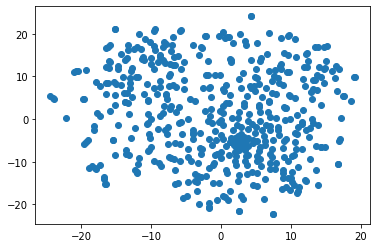

In [28]:
## 2d vizualization of some of the emmbeddings
plt.scatter(Y[:,0],Y[:,1] )

In [29]:
## download files for vizualization in embedding projector 

import io 

out_v = io.open('vecs.tsv', 'w', encoding='utf-8')
out_m = io.open('meta.tsv', 'w', encoding='utf-8')
for word_num in range(0, len(model.wv.vocab)):
  word = index_to_word[word_num]
  embeddings = model['word']
  out_m.write(word + "\n")
  out_v.write('\t'.join([str(x) for x in embeddings]) + "\n")
out_v.close()
out_m.close()

try:
  from google.colab import files
except ImportError:
  pass
else:
  files.download('vecs.tsv')
  files.download('meta.tsv')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  if __name__ == '__main__':
